In [123]:

import pandas as pd 
import seaborn as sns
import numpy as np 
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, mean_squared_error
import xgboost as xgb
import lightgbm as lgbm
import catboost

this is where ı get some information about columns
A description of the clarity:

https://abovediamond.com/learn-diamond-clarity/


Carat: a weight of the cubic zirconia. A metric “carat” is defined as 200 milligrams.
Cut:  describes the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
Color:  refers to the color of the cubic zirconia. With D being the best and J the worst.
Clarity: refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
Depth:  the height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
Table:  the width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
X:  Length of the cubic zirconia in mm.
Y:  Width of the cubic zirconia in mm.
Z:  Height of the cubic zirconia in mm.

In [89]:
train = pd.read_csv("train.csv").drop(columns = "id")

In [90]:
origin = pd.read_csv("original_dataset.csv").drop(columns='Unnamed: 0')

In [91]:
test = pd.read_csv("test.csv").drop(columns = "id")

In [131]:
splgm = pd.read_csv("sample_submission.csv")
spens = pd.read_csv("sample_submission.csv")
spcat = pd.read_csv("sample_submission.csv")


In [93]:
train.head(20)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
5,1.51,Very Good,J,SI1,62.8,58.0,7.34,7.29,4.59,7506
6,0.74,Ideal,E,VS2,61.8,57.0,5.76,5.79,3.57,3229
7,1.34,Premium,G,SI2,62.5,57.0,7.00,7.05,4.38,6224
8,0.30,Ideal,F,IF,62.0,56.0,4.35,4.37,2.70,886
9,0.30,Good,J,VS1,63.6,57.0,4.26,4.28,2.72,421


In [94]:
train.shape , test.shape

((193573, 10), (129050, 9))

In [95]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 14.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129050 entries, 0 to 129049
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    129050 non-null  float64
 1   cut      129050 non-null  object 
 2   color    129050 non-null  object 
 3   clarity  129050 non-null  object 
 4   depth    

(None, None)

In [96]:
train.describe().T


,count,mean,std,min,25%,50%,75%,max
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


In [97]:
target = "price"

In [98]:
train[target].head(20)

0     13619
1     13387
2      2772
3       666
4     14453
5      7506
6      3229
7      6224
8       886
9       421
10     5914
11      505
12     5703
13      789
14     4612
15      723
16     4399
17      574
18     8701
19     2652
Name: price, dtype: int64

In [99]:
train.isnull().sum() ,test.isnull().sum(),origin.isnull().sum()

(carat      0
 cut        0
 color      0
 clarity    0
 depth      0
 table      0
 x          0
 y          0
 z          0
 price      0
 dtype: int64,
 carat      0
 cut        0
 color      0
 clarity    0
 depth      0
 table      0
 x          0
 y          0
 z          0
 dtype: int64,
 carat        0
 cut          0
 color        0
 clarity      0
 depth      697
 table        0
 x            0
 y            0
 z            0
 price        0
 dtype: int64)

TARGET DİSTRİBUTİON

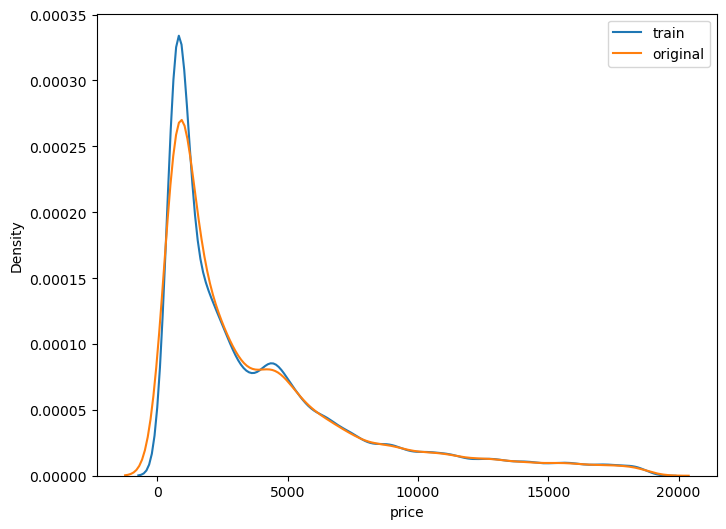

In [100]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=train, x=target, label='train')
sns.kdeplot(data=origin, x=target, label='original')
plt.legend()

In [101]:
 from sklearn.preprocessing import OrdinalEncoder

In [102]:
def process(df):
    df['cut'] = df['cut'].apply(lambda x: cut_dic[x])
    df['color'] = df['color'].apply(lambda x:color_dic[x])
    df['clarity'] = df['clarity'].apply(lambda x:clarity_dic[x])
    df["volume"] = df["x"] * df["y"] * df["z"]
    df["surface_area"] = 2 * (df["x"] * df["y"] + df["y"] * df["z"] + df["z"] * df["x"])
    df["aspect_ratio_xy"] = df["x"] / df["y"]
    df["aspect_ratio_yz"] = df["y"] / df["z"]
    df["aspect_ratio_zx"] = df["z"] / df["x"]
    df["diagonal_distance"] = np.sqrt(df["x"] ** 2 + df["y"] ** 2 + df["z"] ** 2)
    df["relative_height"] = (df["z"] - df["z"].min()) / (df["z"].max() - df["z"].min())
    df["relative_position"] = (df["x"] + df["y"] + df["z"]) / (df["x"] + df["y"] + df["z"]).sum()
    df["volume_ratio"] = df["x"] * df["y"] * df["z"] / (df["x"].mean() * df["y"].mean() * df["z"].mean())
    df["length_ratio"] = df["x"] / df["x"].mean()
    df["width_ratio"] = df["y"] / df["y"].mean()
    df["height_ratio"] = df["z"] / df["z"].mean()
    df["sphericity"] = 1.4641 * (6 * df["volume"])**(2/3) / df["surface_area"]
    df["compactness"] = df["volume"]**(1/3) / df["x"]
    
    return df

In [103]:
cut_dic = {'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4}
color_dic = {'D':6,'E':5,'F':4,'G':3,'H':2,'I':1,'J':0}
clarity_dic = {'FL':10, 'IF':9, 'VVS1':8, 'VVS2':7, 'VS1':6, 'VS2':5, 'SI1':4, 'SI2':3, 'I1':2, 'I2':1, 'I3':0}
train_df = process(train)
test_df = process(test)

In [104]:
train.shape , test.shape

((193573, 24), (129050, 23))

In [107]:
y = train.price

In [108]:
x_train = train.drop(columns = "price", axis = 1)

In [109]:
x_train.shape

(193573, 23)

In [113]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y, test_size=0.2, random_state=0)

In [122]:

lgbm_params = {
        'task': 'train',
        'objective': "regression",
        'metric': "rmse",
        'boosting_type': 'gbdt',
        'learning_rate': 0.0005,
        'num_iterations': 300000,
        'max_depth': -1,
        'feature_pre_filter': False,
        'lambda_l1': 2.877895439833595e-06,
        'lambda_l2': 0.00046039862026592493,
        'num_leaves': 31,
        'feature_fraction': 0.7,
        'bagging_fraction': 1.0,
        'bagging_freq': 0,
        'min_child_samples': 50,
        'verbosity': -1
    }
lgb_train = lgbm.Dataset(x_train, y_train)
lgb_eval = lgbm.Dataset(x_val, y_val, reference=lgb_train)
evaluation_results = {}                       

In [124]:
evaluation_results = {}                       
model = lgbm.train(
    lgbm_params,
    valid_names=['train', 'valid'],           
    valid_sets=[lgb_train, lgb_eval],     
    evals_result=evaluation_results,      
    train_set=lgb_train,
    early_stopping_rounds=1000,
    verbose_eval=1000
)

C:\Users\diyar\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\diyar\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\diyar\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\diyar\anaconda3\lib\site-packages\lightgbm\engine.py:26

Training until validation scores don't improve for 1000 rounds
[1000]	train's rmse: 2537.17	valid's rmse: 2540.57
[2000]	train's rmse: 1654.57	valid's rmse: 1656.98
[3000]	train's rmse: 1149.41	valid's rmse: 1151.55
[4000]	train's rmse: 873.862	valid's rmse: 875.686
[5000]	train's rmse: 730.244	valid's rmse: 732.103
[6000]	train's rmse: 656.831	valid's rmse: 658.824
[7000]	train's rmse: 619.027	valid's rmse: 621.366
[8000]	train's rmse: 598.221	valid's rmse: 601.058
[9000]	train's rmse: 586.1	valid's rmse: 589.503
[10000]	train's rmse: 578.678	valid's rmse: 582.856
[11000]	train's rmse: 573.64	valid's rmse: 578.622
[12000]	train's rmse: 570.029	valid's rmse: 576.054
[13000]	train's rmse: 567.16	valid's rmse: 574.499
[14000]	train's rmse: 564.874	valid's rmse: 573.494
[15000]	train's rmse: 562.877	valid's rmse: 572.833
[16000]	train's rmse: 560.99	valid's rmse: 572.418
[17000]	train's rmse: 559.243	valid's rmse: 572.132
[18000]	train's rmse: 557.661	valid's rmse: 571.894
[19000]	train's

In [125]:
catboost_clf = catboost.CatBoostRegressor(n_estimators=10000,random_state=100,verbose= 100, loss_function='RMSE',eval_metric="RMSE")

catboost_clf.fit(x_train, y_train,
                 early_stopping_rounds=100, 
             eval_set=[(x_val, y_val)])

Learning rate set to 0.027588
0:	learn: 3932.4459689	test: 3937.3839450	best: 3937.3839450 (0)	total: 188ms	remaining: 31m 15s
100:	learn: 729.6039536	test: 729.3462851	best: 729.3462851 (100)	total: 1.23s	remaining: 2m
200:	learn: 601.4933999	test: 601.0753471	best: 601.0753471 (200)	total: 2.26s	remaining: 1m 50s
300:	learn: 584.3547281	test: 584.4624513	best: 584.4624513 (300)	total: 3.2s	remaining: 1m 43s
400:	learn: 577.2120557	test: 578.6740773	best: 578.6740773 (400)	total: 4.13s	remaining: 1m 38s
500:	learn: 572.5841166	test: 575.9528460	best: 575.9528460 (500)	total: 5.13s	remaining: 1m 37s
600:	learn: 568.8189690	test: 574.4751215	best: 574.4704210 (599)	total: 6.16s	remaining: 1m 36s
700:	learn: 565.9769538	test: 573.4057976	best: 573.4057976 (700)	total: 7.18s	remaining: 1m 35s
800:	learn: 563.1113771	test: 572.8097968	best: 572.8097968 (800)	total: 8.19s	remaining: 1m 34s
900:	learn: 560.5091715	test: 572.4662758	best: 572.4600959 (899)	total: 9.2s	remaining: 1m 32s
1000:	

In [127]:
lgbm_preds = model.predict(test)
cat_preds = catboost_clf.predict(test)
final_preds = np.column_stack([lgbm_preds, cat_preds]).mean(axis=1)

In [132]:
splgm["price"] = lgbm_preds
splgm.to_csv("lgbm.csv" , index = False)

In [133]:
spcat["price"] = cat_preds
spcat.to_csv("cat.csv")

In [134]:
sp["price"] = final_preds
sp.to_csv("ensemble.csv" , index = False)

In [142]:
submission2 = pd.read_csv("cat.csv").drop(columns = "Unnamed: 0" )

In [137]:
pd.read_csv("ensemble.csv")

,id,price
0,193573,1329.872046
1,193574,2670.570140
2,193575,2488.188182
3,193576,1279.620544
4,193577,6648.893272
...,...,...
129045,322618,4403.581742
129046,322619,2768.025093
129047,322620,7818.915303
129048,322621,6683.036947


In [140]:
sp.to_csv("submission.csv",index= 0)

In [141]:
pd.read_csv("submission.csv")

,id,price
0,193573,1329.872046
1,193574,2670.570140
2,193575,2488.188182
3,193576,1279.620544
4,193577,6648.893272
...,...,...
129045,322618,4403.581742
129046,322619,2768.025093
129047,322620,7818.915303
129048,322621,6683.036947


In [148]:
submission2.to_csv("submission2.csv",index= 0)